In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
X=dataset.iloc[:,[3,4]].values

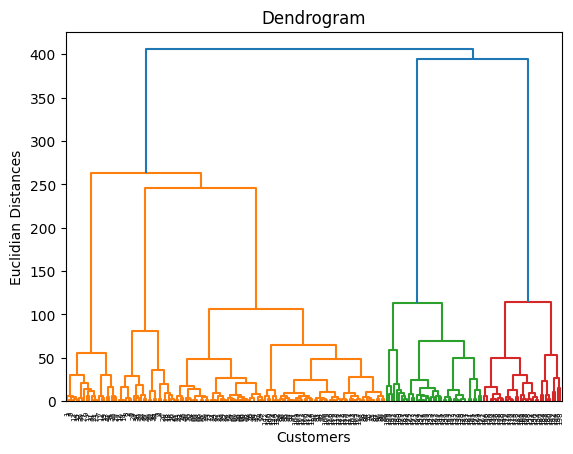

In [4]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
graph=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title("Dendrogram")
plt.xlabel('Customers')
plt.ylabel('Euclidian Distances')
plt.show()

In [40]:
from sklearn.cluster import MeanShift
m_shift=MeanShift(bandwidth=20,bin_seeding=True)
m_shift_predict=m_shift.fit_predict(X)
m_shift_predict

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5,
       6, 5], dtype=int64)

In [41]:
supervised=pd.DataFrame(dataset)

In [42]:
supervised['cluster_group']=m_shift_predict

In [43]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,5
196,197,Female,45,126,28,6
197,198,Male,32,126,74,5
198,199,Male,32,137,18,6


In [44]:
supervised.to_csv("cluster_mean_shift.csv",index=False)

In [45]:
centroids=m_shift.cluster_centers_
centroids

array([[ 54.61538462,  50.02564103],
       [ 79.53333333,  83.13333333],
       [ 80.5       ,  13.45833333],
       [ 25.0952381 ,  80.04761905],
       [ 26.10526316,  17.42105263],
       [119.8       ,  82.4       ],
       [124.        ,  17.5       ]])

C:\Users\jayac\AppData\Local\anaconda3\envs\aiml\Lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
C:\Users\jayac\AppData\Local\anaconda3\envs\aiml\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


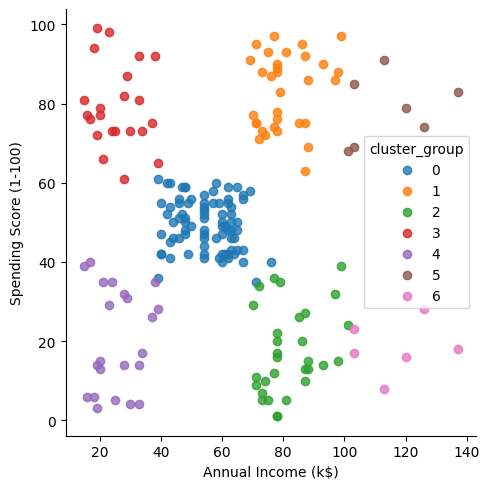

In [46]:
import seaborn as sns
graph=sns.lmplot(data=supervised,
                x=supervised.columns[3],
                y=supervised.columns[4],
                hue=supervised.columns[5],
                fit_reg=False,
                legend=True,
                legend_out=False)